In [1]:
# Gerekli kütüphanelerin yüklenmesi
import numpy as np 
import pandas as pd 
import os

# Görselleştirme kütüphaneleri
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pycountry
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
py.init_notebook_mode(connected=True)

import folium
from folium import Choropleth, Circle, Marker
from folium import plugins
from folium.plugins import HeatMap, MarkerCluster


# Grafik boyutunu değiştirme
plt.rcParams['figure.figsize'] = 8, 5
plt.style.use("fivethirtyeight")

for dizinadi, _, dosyaisimleri in os.walk('Veriler'):
    for dosyaismi in dosyaisimleri:
        print(os.path.join(dizinadi, dosyaismi))

# Uyarıları devre dışı bırak
import warnings
warnings.filterwarnings('ignore')

Veriler\a.py
Veriler\istasyonlarin_gunluk_verisi.csv
Veriler\Yeni klasör\csv.rar
Veriler\Yeni klasör\veri_akcaabat.csv
Veriler\Yeni klasör\veri_besirli.csv
Veriler\Yeni klasör\veri_besirli.xlsx
Veriler\Yeni klasör\veri_fatih.csv
Veriler\Yeni klasör\veri_fatih.xlsx
Veriler\Yeni klasör\veri_meydan.csv
Veriler\Yeni klasör\veri_meydan.xlsx
Veriler\Yeni klasör\veri_uzungol.csv
Veriler\Yeni klasör\veri_uzungol.xlsx
Veriler\Yeni klasör\veri_valilik.csv
Veriler\Yeni klasör\veri_valilik.xlsx
Veriler\Yeni klasör\csv\veri_akcaabat.csv
Veriler\Yeni klasör\csv\veri_besirli.csv
Veriler\Yeni klasör\csv\veri_fatih.csv
Veriler\Yeni klasör\csv\veri_meydan.csv
Veriler\Yeni klasör\csv\veri_uzungol.csv
Veriler\Yeni klasör\csv\veri_valilik.csv


In [2]:
istasyon_gunluk = pd.read_csv('Veriler/istasyonlarin_gunluk_verisi.csv')

In [3]:
display("İstasyonların Günlük Verisi")
display(istasyon_gunluk.head(5))

'İstasyonların Günlük Verisi'

,Istasyon,Tarih,PM10,SO2,CO,NO2,NOX,NO,O3
0,Akcaabat,1/1/2019,33.667655,11.716901,914.801808,33.503359,44.252109,10.748751,29.743932
1,Akcaabat,1/2/2019,65.087444,22.262946,1436.981921,57.587279,95.126121,37.538841,23.427460
2,Akcaabat,1/3/2019,77.366410,19.615486,1322.937491,58.792529,95.409477,36.616948,29.528927
3,Akcaabat,1/4/2019,59.645559,18.239013,1088.972087,52.013013,74.637182,22.624171,31.338699
4,Akcaabat,1/5/2019,32.578143,10.692952,1033.839888,37.565636,48.228990,10.663354,32.689416


In [4]:
#Boş verilere bakalım
istasyon_gunluk.isnull().sum()

Istasyon       0
Tarih          0
PM10         811
SO2          775
CO           670
NO2          578
NOX          577
NO           895
O3          1827
dtype: int64

In [5]:
#Boş verileri o sütundaki değerlerin ortalaması ile dolduracağım.Öncelikle verilerin bir kopyasını alıyorum.
istasyon_gunluk_kopyası = istasyon_gunluk.copy()

In [6]:
#Boş verileri sütunların ortalamaları ile dolduruyorum.
istasyon_gunluk_kopyası=istasyon_gunluk_kopyası.fillna(istasyon_gunluk_kopyası.mean())

In [7]:
#Boş verilere tekrar bakalım çalıştı mı
istasyon_gunluk_kopyası.isnull().sum()

Istasyon    0
Tarih       0
PM10        0
SO2         0
CO          0
NO2         0
NOX         0
NO          0
O3          0
dtype: int64

In [8]:
#Verinin istatistiksel bilgileri
istasyon_gunluk_kopyası.describe().T

,count,mean,std,min,25%,50%,75%,max
PM10,2190.0,40.583165,17.938196,5.121526,30.733152,40.583165,40.583165,154.350897
SO2,2190.0,133.313370,187.872338,0.117878,4.526161,133.313370,133.313370,1069.154817
CO,2190.0,328.556148,348.305171,2.275814,45.162918,328.556148,447.947100,2249.612917
NO2,2190.0,51.688162,33.755625,4.455961,31.418911,51.688162,58.389656,329.748528
NOX,2190.0,41.056698,42.858936,1.406878,19.126774,39.294459,41.056698,354.546128
NO,2190.0,37.359283,28.377852,0.780413,21.450898,37.359283,38.603304,250.304961
O3,2190.0,50.522954,6.821684,10.286362,50.522954,50.522954,50.522954,94.562284


In [9]:
istasyon_gunluk_kopyası.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Istasyon  2190 non-null   object 
 1   Tarih     2190 non-null   object 
 2   PM10      2190 non-null   float64
 3   SO2       2190 non-null   float64
 4   CO        2190 non-null   float64
 5   NO2       2190 non-null   float64
 6   NOX       2190 non-null   float64
 7   NO        2190 non-null   float64
 8   O3        2190 non-null   float64
dtypes: float64(7), object(2)
memory usage: 154.1+ KB


In [10]:
istasyon_gunluk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Istasyon  2190 non-null   object 
 1   Tarih     2190 non-null   object 
 2   PM10      1379 non-null   float64
 3   SO2       1415 non-null   float64
 4   CO        1520 non-null   float64
 5   NO2       1612 non-null   float64
 6   NOX       1613 non-null   float64
 7   NO        1295 non-null   float64
 8   O3        363 non-null    float64
dtypes: float64(7), object(2)
memory usage: 154.1+ KB


In [11]:
# Eksik Değerler
def eksik_degerlerin_tablosu(df):
        # Toplam eksik değer
        eksik_deger = df.isnull().sum()
        
        # Eksik değerlerin yüzdesi
        eksik_deger_yuzdesi = 100 * df.isnull().sum() / len(df)
        
        # Tablo oluşturalım
        eksik_deger_tablosu = pd.concat([eksik_deger, eksik_deger_yuzdesi], axis=1)
        
        # Sütun adı
        eksik_deger_tablo_sütun = eksik_deger_tablosu.rename(
        columns = {0 : 'Eksik Değerler', 1 : '% olarak Toplam Değer'})
        
        # Tabloyu eksik azalan yüzdeye göre sırala
        eksik_deger_tablo_sütun = eksik_deger_tablo_sütun[
            eksik_deger_tablo_sütun.iloc[:,1] != 0].sort_values(
        '% olarak Toplam Değer', ascending=False).round(1)
        
        # Toplanan bilgiyi yazdır
        print ("Seçilen veride " + str(df.shape[1]) + " sütun var.\n"      
            "Eksik değerleri olan " + str(eksik_deger_tablo_sütun.shape[0]) +
              " sütun vardır.")
        
        # Eksik verileri döndür
        return eksik_deger_tablo_sütun

eksik_degerler= eksik_degerlerin_tablosu(istasyon_gunluk)
eksik_degerler.style.background_gradient(cmap='Reds')

Seçilen veride 9 sütun var.
Eksik değerleri olan 7 sütun vardır.


,Eksik Değerler,% olarak Toplam Değer
O3,1827,83.400000
NO,895,40.900000
PM10,811,37.000000
SO2,775,35.400000
CO,670,30.600000
NO2,578,26.400000
NOX,577,26.300000


In [12]:
# Stringi tarihe dönüştür
istasyon_gunluk['Tarih'] = pd.to_datetime(istasyon_gunluk['Tarih'])

In [13]:
print(f" {istasyon_gunluk['Tarih'].min()} ve {istasyon_gunluk['Tarih'].max()} tarihleri arasında veri vardır.")

 2019-01-01 00:00:00 ve 2019-12-31 00:00:00 tarihleri arasında veri vardır.


In [14]:
istasyon_gunluk['Partikül Madde'] =istasyon_gunluk['PM10']

In [15]:
maddeler = ['PM10','NO2', 'CO', 'SO2', 'O3', 'NOX', 'NO']

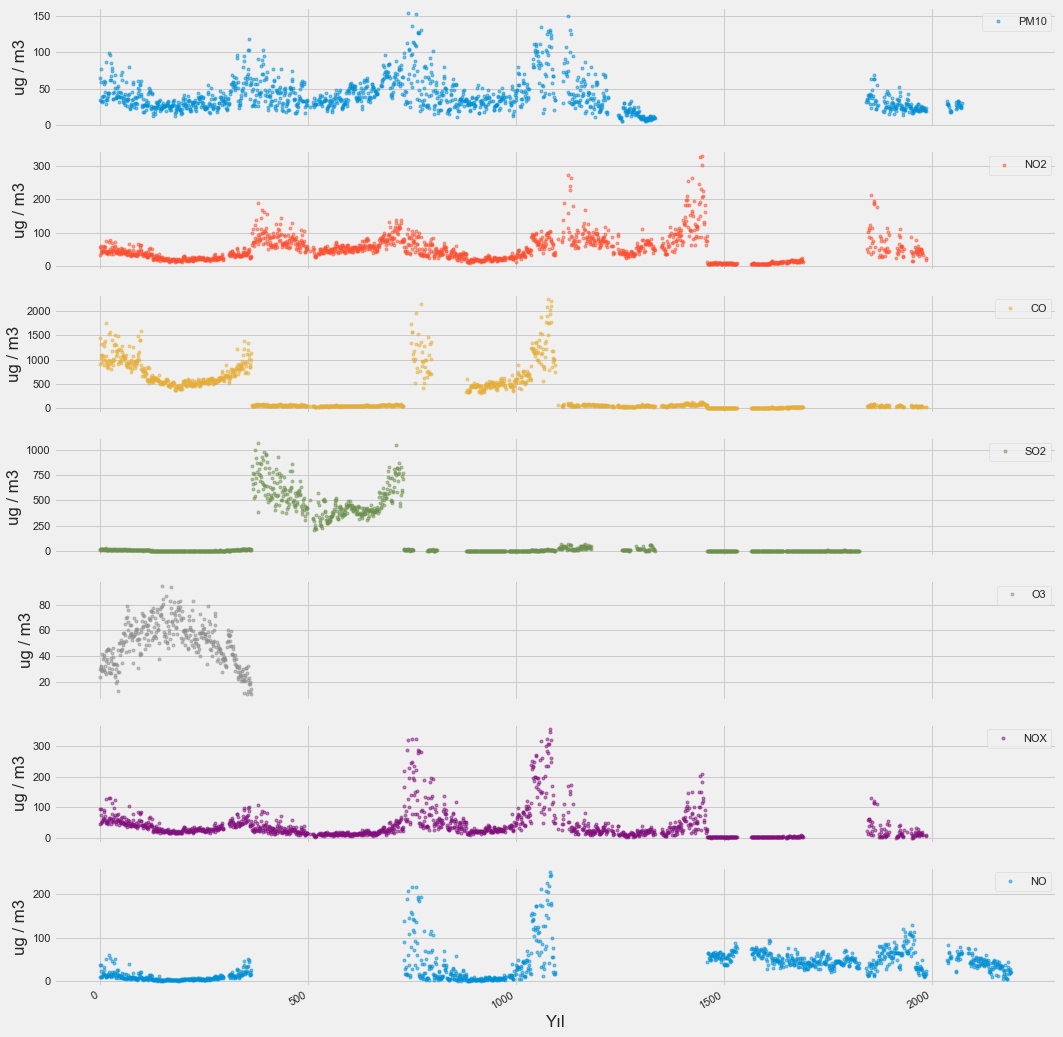

In [16]:
madde_verileri = istasyon_gunluk[maddeler].plot(marker='.', alpha=0.5, linestyle='None', figsize=(16, 20), subplots=True)
for veri in madde_verileri:
    veri.set_xlabel('Yıl')
    veri.set_ylabel('ug / m3')

In [17]:
def egilim_grafigi(df,deger):
    
    df['yıl'] = [d.year for d in df.Tarih]
    df['ay'] = [d.strftime('%b') for d in df.Tarih]
    years = df['yıl'].unique()

    fig, axes = plt.subplots(1, 2, figsize=(20,6), dpi= 80)
    sns.boxplot(x='yıl', y=deger, data=df, ax=axes[0])
    sns.pointplot(x='ay', y=deger, data=df.loc[~df.yıl.isin([2015, 2020]), :])

    axes[0].set_title('Yıllık Kutu Grafiği', fontsize=18); 
    axes[1].set_title('Aylık Grafik', fontsize=18)
    plt.show()


In [18]:
#Şimdi, kutu grafiklerle verilerimizin mevsimselliğini daha ayrıntılı inceleyelim. Verileri farklı 
#zaman aralıklarına göre gruplamak ve her grup için dağılımları göstermek için kutu grafikleri kullanacağız. 
#Verileri yıl ve aya göre gruplandıracağız. Tüm ölçümler ug / m3 şeklindedir.

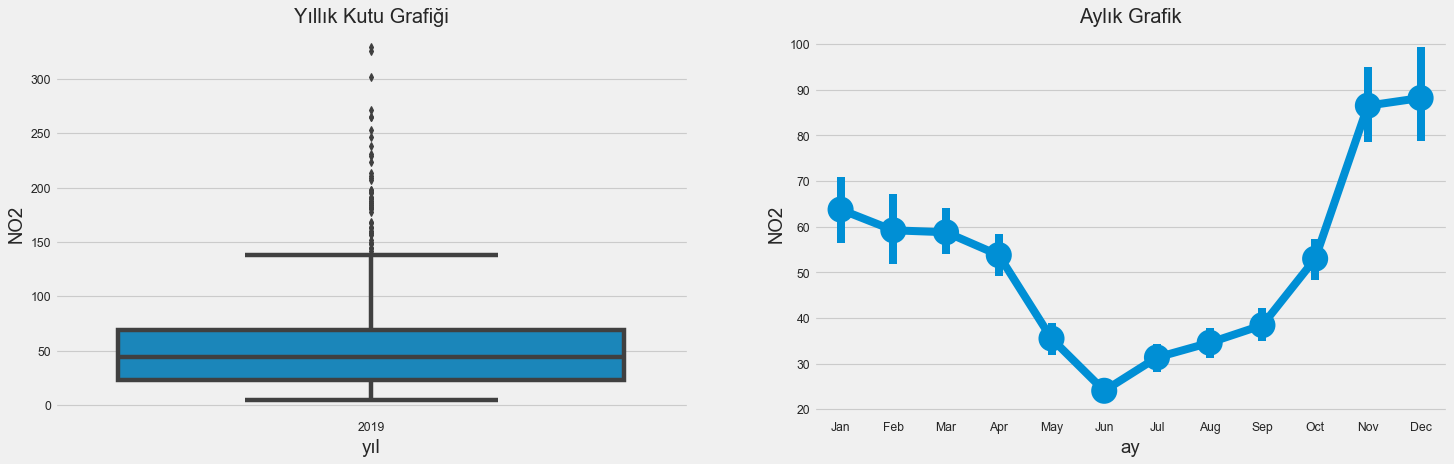

In [19]:
df = istasyon_gunluk.copy()

madde='NO2'
egilim_grafigi(df,madde)


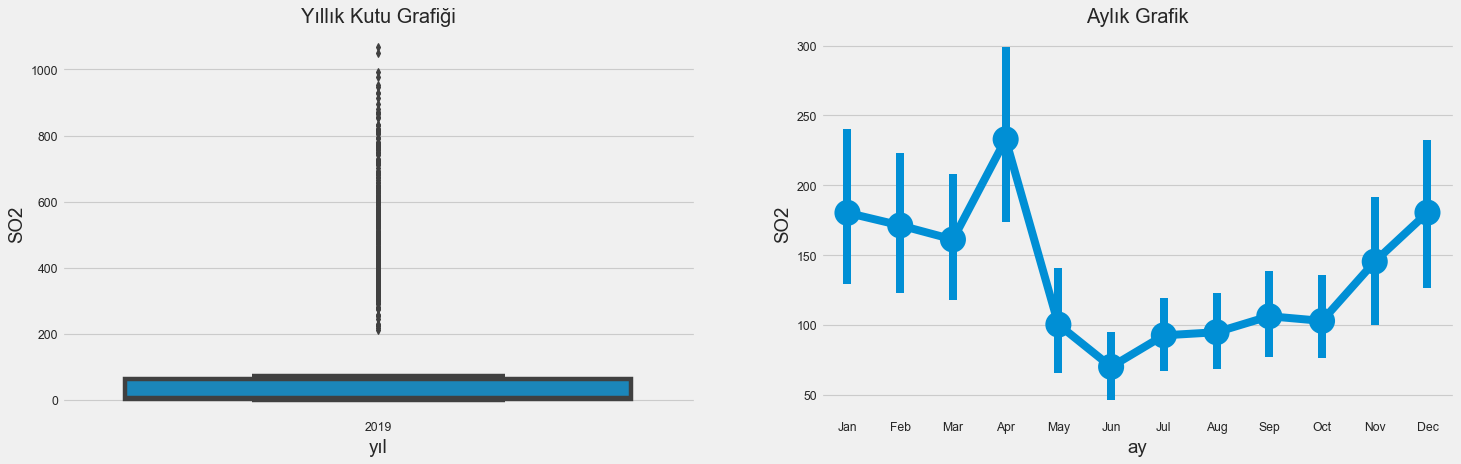

In [20]:
istasyon_gunluk.reset_index(drop=True)
madde='SO2'
egilim_grafigi(df,madde)

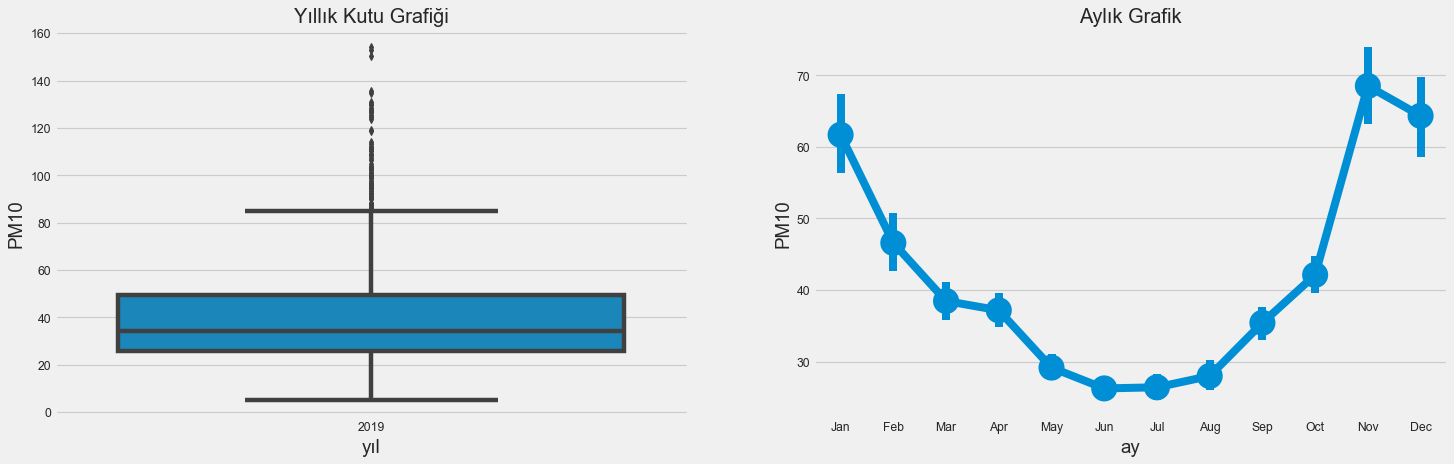

In [21]:
madde='PM10'
egilim_grafigi(df,madde)

In [22]:
#Bundan sonraki hedefim hava kalitesi indeksini hesaplamak ve 2020nin ilk çeyreği hakkında karşılaştırma yapmak
#Daha önceki yıllar ile karşılaştırma yapacağım
#Trabzonun diğer ilçelerini de veri setime ekleyeyeceğim

In [23]:
def en_kirli_istasyon(pollutant):
    x1 = istasyon_gunluk[[pollutant,'Istasyon']].groupby(["Istasyon"]).mean().sort_values(by=pollutant,ascending=False).reset_index()
    x1[pollutant] = round(x1[pollutant],2)
    return x1[:10].style.background_gradient(cmap='OrRd')

In [24]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.render()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [25]:
pm10 = en_kirli_istasyon('PM10')
so2 = en_kirli_istasyon('SO2')
co = en_kirli_istasyon('CO')
no2 = en_kirli_istasyon('NO2')
nox = en_kirli_istasyon('NOX')
no = en_kirli_istasyon('NO')
o3 = en_kirli_istasyon('O3')

display_side_by_side(pm10,so2,co,no2,nox,no,o3)

,Istasyon,PM10
0,Fatih,50.090000
1,Besirli,44.500000
2,Akcaabat,37.640000
3,Meydan,32.580000
4,Valilik,28.180000
5,Uzungol,nan
,Istasyon,SO2
0,Besirli,513.330000
1,Meydan,26.490000
2,Akcaabat,8.450000


In [26]:

x2 = istasyon_gunluk[['PM10','Istasyon']].groupby(["Istasyon"]).median().sort_values(by='PM10',ascending=False).reset_index()
x3 = istasyon_gunluk[['SO2','Istasyon']].groupby(["Istasyon"]).median().sort_values(by='SO2',ascending=False).reset_index()

from plotly.subplots import make_subplots
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("PM10","SO2"))

fig.add_trace(go.Bar( y=x2['PM10'], x=x2["Istasyon"],  
                     marker=dict(color=x2['PM10'], coloraxis="coloraxis")),
              1, 1)


fig.add_trace(go.Bar( y=x3['SO2'], x=x2["Istasyon"],  
                     marker=dict(color=x3['SO2'], coloraxis="coloraxis")),
              1, 2)
fig.update_layout(coloraxis=dict(colorscale='reds'), showlegend=False,plot_bgcolor='white')
fig.update_xaxes(ticks="outside", tickwidth=2,tickangle=45, tickcolor='crimson', ticklen=10,title_text="istasyonlar")
fig.update_yaxes(title_text="ug / m3", row=1, col=1)
fig.update_yaxes(title_text="ug / m3", row=1, col=2)
fig.show()

In [27]:
x4 = istasyon_gunluk[['CO','Istasyon']].groupby(["Istasyon"]).median().sort_values(by='CO',ascending=False).reset_index()
x5 = istasyon_gunluk[['NO2','Istasyon']].groupby(["Istasyon"]).median().sort_values(by='NO2',ascending=False).reset_index()
x6 = istasyon_gunluk[['NOX','Istasyon']].groupby(["Istasyon"]).median().sort_values(by='NOX',ascending=False).reset_index()
x7 = istasyon_gunluk[['NO','Istasyon']].groupby(["Istasyon"]).median().sort_values(by='NO',ascending=False).reset_index()
x8 = istasyon_gunluk[['O3','Istasyon']].groupby(["Istasyon"]).median().sort_values(by='O3',ascending=False).reset_index()

from plotly.subplots import make_subplots
fig = make_subplots(
    rows=3, cols=3,
    subplot_titles=("CO","NO2",'NOX','NO','O3'))

fig.add_trace(go.Bar( y=x4['CO'], x=x4["Istasyon"],  
                     marker=dict(color=x4['CO'], coloraxis="coloraxis")),
              1, 1)

fig.add_trace(go.Bar( y=x5['NO2'], x=x5["Istasyon"],  
                     marker=dict(color=x5['NO2'], coloraxis="coloraxis")),
              1, 2)

fig.add_trace(go.Bar( y=x6['NOX'], x=x6["Istasyon"],  
                     marker=dict(color=x6['NOX'], coloraxis="coloraxis")),
              1, 3)

fig.add_trace(go.Bar( y=x7['NO'], x=x7["Istasyon"],  
                     marker=dict(color=x7['NO'], coloraxis="coloraxis")),
              3, 1)

fig.add_trace(go.Bar( y=x8['O3'], x=x8["Istasyon"],  
                     marker=dict(color=x8['O3'], coloraxis="coloraxis")),
              3, 2)
fig.update_layout(coloraxis=dict(colorscale='reds'), showlegend=False,plot_bgcolor='white')
fig.update_xaxes(ticks="outside", tickwidth=2,tickangle=45, tickcolor='crimson', ticklen=10,title_text="istasyonlar")
fig.update_yaxes(title_text="ug / m3", row=1, col=1)
fig.update_yaxes(title_text="ug / m3", row=1, col=2)
fig.update_yaxes(title_text="ug / m3", row=1, col=3)
fig.update_yaxes(title_text="ug / m3", row=2, col=1)
fig.update_yaxes(title_text="ug / m3", row=2, col=2)
fig.show()

In [28]:
#AQI HESAPLA VE AÇIKLAMASINI BULMA

In [29]:
#Hava kalite indeksini PM10'a göre bul
istasyon_gunluk_kopya = istasyon_gunluk.copy()
istasyon_gunluk_kopya=istasyon_gunluk_kopya.fillna(istasyon_gunluk_kopya.mean())
 
import warnings
warnings.filterwarnings('ignore')

import aqi 
uzunluk = len(istasyon_gunluk_kopya)
a = np.zeros(uzunluk)
for i in range(uzunluk):
    myaqi = aqi.to_aqi([
        (aqi.POLLUTANT_PM10, istasyon_gunluk_kopya['PM10'][i])], algo=aqi.ALGO_MEP)
    a[i] = myaqi

def aqi_durumu(x):
    if x <= 50:
        return "İyi"
    elif x <= 100:
        return "Yeterli"
    elif x <= 200:
        return "Orta"
    elif x <= 300:
        return "Kötü"
    elif x <= 400:
        return "Çok Kötü"
    elif x > 400:
        return "Ciddi"
    else:
        return np.NaN
durum = []
for i in range(2190):
    durum.append(aqi_durumu(a[i])) 
 

In [30]:
dataDurumSayi = pd.DataFrame(a)
dataDurumSayi.columns = ['AQI']
dataDurumSayi.head()

,AQI
0,33.0
1,65.0
2,77.0
3,59.0
4,32.0


In [31]:
dataDurum = pd.DataFrame(durum)
dataDurum.columns = ['AQI Açıklaması']
dataDurum.head()

,AQI Açıklaması
0,İyi
1,Yeterli
2,Yeterli
3,Yeterli
4,İyi


In [32]:
dataFrameler = [istasyon_gunluk_kopya, dataDurumSayi, dataDurum]
sonucDataFrame = pd.concat(dataFrameler,axis=1, sort=False)
sonucDataFrame.head()


,Istasyon,Tarih,PM10,SO2,CO,NO2,NOX,NO,O3,Partikül Madde,AQI,AQI Açıklaması
0,Akcaabat,2019-01-01,33.667655,11.716901,914.801808,33.503359,44.252109,10.748751,29.743932,33.667655,33.0,İyi
1,Akcaabat,2019-01-02,65.087444,22.262946,1436.981921,57.587279,95.126121,37.538841,23.427460,65.087444,65.0,Yeterli
2,Akcaabat,2019-01-03,77.366410,19.615486,1322.937491,58.792529,95.409477,36.616948,29.528927,77.366410,77.0,Yeterli
3,Akcaabat,2019-01-04,59.645559,18.239013,1088.972087,52.013013,74.637182,22.624171,31.338699,59.645559,59.0,Yeterli
4,Akcaabat,2019-01-05,32.578143,10.692952,1033.839888,37.565636,48.228990,10.663354,32.689416,32.578143,32.0,İyi


In [33]:
istasyonlar = ['Akcaabat','Besirli','Fatih','Meydan','Uzungol','Valilik']

filtreli_istasyon_gunluk = sonucDataFrame[sonucDataFrame['Tarih'] >= '2019-01-01']
AQI = filtreli_istasyon_gunluk[filtreli_istasyon_gunluk.Istasyon.isin(istasyonlar)][['Tarih','Istasyon','AQI','AQI Açıklaması']]
AQI.head()

,Tarih,Istasyon,AQI,AQI Açıklaması
0,2019-01-01,Akcaabat,33.0,İyi
1,2019-01-02,Akcaabat,65.0,Yeterli
2,2019-01-03,Akcaabat,77.0,Yeterli
3,2019-01-04,Akcaabat,59.0,Yeterli
4,2019-01-05,Akcaabat,32.0,İyi


In [34]:
AQI_2019_pivot = AQI.pivot(index='Tarih', columns='Istasyon', values='AQI')
AQI_2019_pivot.fillna(method='bfill',inplace=True)


from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    subplot_titles=('Akcaabat','Besirli','Fatih','Meydan','Uzungol','Valilik'))

fig.add_trace(go.Bar(x=AQI_2019_pivot.index, y=AQI_2019_pivot['Akcaabat'],
                    marker=dict(color=AQI_2019_pivot['Akcaabat'],coloraxis="coloraxis")),
              1, 1)
fig.add_trace(go.Bar(x=AQI_2019_pivot.index, y=AQI_2019_pivot['Besirli'],
                    marker=dict(color=AQI_2019_pivot['Besirli'], coloraxis="coloraxis")),
              2, 1)
fig.add_trace(go.Bar(x=AQI_2019_pivot.index, y=AQI_2019_pivot['Fatih'],
                    marker=dict(color=AQI_2019_pivot['Fatih'], coloraxis="coloraxis")),
              3, 1)
fig.add_trace(go.Bar(x=AQI_2019_pivot.index, y=AQI_2019_pivot['Meydan'],
                    marker=dict(color=AQI_2019_pivot['Meydan'], coloraxis="coloraxis")),
              4, 1)
fig.add_trace(go.Bar(x=AQI_2019_pivot.index, y=AQI_2019_pivot['Uzungol'],
                    marker=dict(color=AQI_2019_pivot['Uzungol'], coloraxis="coloraxis")),
              5, 1)
fig.add_trace(go.Bar(x=AQI_2019_pivot.index, y=AQI_2019_pivot['Valilik'],
                    marker=dict(color=AQI_2019_pivot['Valilik'], coloraxis="coloraxis")),
              6, 1)

fig.update_layout(coloraxis=dict(colorscale='Temps'),showlegend=False,title_text="AQI Seviyesi")

fig.update_layout(plot_bgcolor='white')

fig.update_layout( width=1000,height=1200,shapes=[
      dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= '2019-10-25', x1= '2019-10-25'
    )
])

fig.show()

In [36]:
#Uzungolde Hiç PM10 değeri ölçülemedi için AQI seviyesi bulunamadı.

In [37]:
#Bundan sonra 2019 verileri ile 2020 verilerinin karşılaştırılması yapılacaktır.